In [1]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [3]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='RybtIpezEc4Q3zGBYWS9v-rR5tvHuqdEiEsqrGH0vO4X',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'vehicleperformanceanalyzer-donotdelete-pr-apsgl4djhd1yss'
object_key = 'car performance.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
car = pd.read_csv(body)
car.head()


mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0         130    3504          12.0   
1  15.0          8         350.0         165    3693          11.5   
2  18.0          8         318.0         150    3436          11.0   
3  16.0          8         304.0         150    3433          12.0   
4  17.0          8         302.0         140    3449          10.5   

   model year  origin                   car name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino

In [4]:
car

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0         130    3504          12.0   
1    15.0          8         350.0         165    3693          11.5   
2    18.0          8         318.0         150    3436          11.0   
3    16.0          8         304.0         150    3433          12.0   
4    17.0          8         302.0         140    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0          86    2790          15.6   
394  44.0          4          97.0          52    2130          24.6   
395  32.0          4         135.0          84    2295          11.6   
396  28.0          4         120.0          79    2625          18.6   
397  31.0          4         119.0          82    2720          19.4   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu  
1            70       1          buick skylark 320  
2            70       1         plymouth satellite  
3            70       1              amc rebel sst  
4            70       1                ford torino  
..          ...     ...                        ...  
393          82       1            ford mustang gl  
394          82       2                  vw pickup  
395          82       1              dodge rampage  
396          82       1                ford ranger  
397          82       1                 chevy s-10  

[398 rows x 9 columns]

In [5]:
Numeric_features = [x for x in car.columns if car[x].dtypes != "O"]
print("The number of Numeric_variable",len(Numeric_features))
car[Numeric_features].head()

The number of Numeric_variable 8


mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0         130    3504          12.0   
1  15.0          8         350.0         165    3693          11.5   
2  18.0          8         318.0         150    3436          11.0   
3  16.0          8         304.0         150    3433          12.0   
4  17.0          8         302.0         140    3449          10.5   

   model year  origin  
0          70       1  
1          70       1  
2          70       1  
3          70       1  
4          70       1

In [6]:
Discrete_features = [x for x in car.columns if car[x].dtype == "O"]
print('Number of Discrete variables: ', len(Discrete_features))
car[Discrete_features].head()

Number of Discrete variables:  1


car name
0  chevrolet chevelle malibu
1          buick skylark 320
2         plymouth satellite
3              amc rebel sst
4                ford torino

In [7]:
continous_variable = [feature for feature in Numeric_features if len(car[feature].unique()) > 25]
print("The number of Categorical_variable",len(continous_variable))
car[continous_variable].head()

The number of Categorical_variable 5


mpg  displacement  horsepower  weight  acceleration
0  18.0         307.0         130    3504          12.0
1  15.0         350.0         165    3693          11.5
2  18.0         318.0         150    3436          11.0
3  16.0         304.0         150    3433          12.0
4  17.0         302.0         140    3449          10.5

In [8]:
discrete_variable = [feature for feature in Numeric_features if len(car[feature].unique()) < 25]
print('Number of Continous variables: ', len(discrete_variable))
car[discrete_variable].head()

Number of Continous variables:  3


cylinders  model year  origin
0          8          70       1
1          8          70       1
2          8          70       1
3          8          70       1
4          8          70       1

<h1 style = "color:red";> Pandas Profile</h1>

In [9]:
ProfileReport(car)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<h1 style = "color:blue";> Exploratory Data Analysis</h1>

<h1 style = "color:green";> Univariate Analysis </h1>

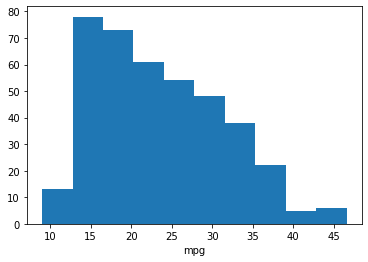

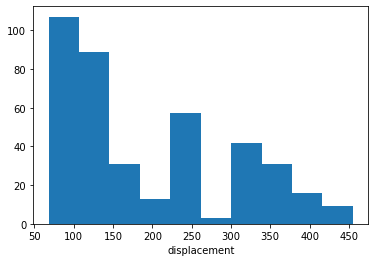

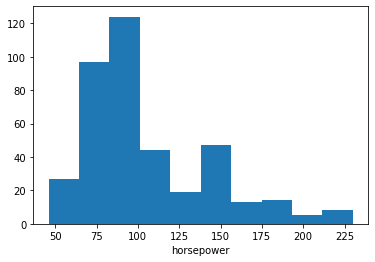

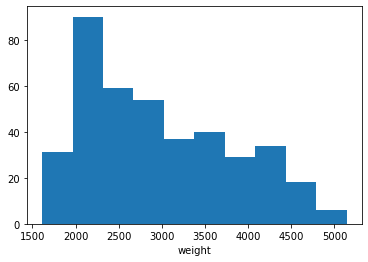

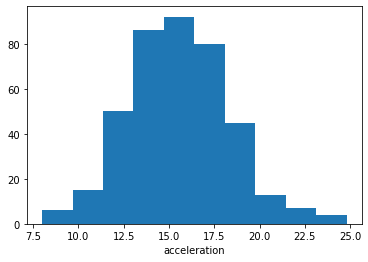

In [10]:
for feature in continous_variable:
    plt.hist(x=feature,data=car)
    plt.xlabel(feature)
    plt.show()

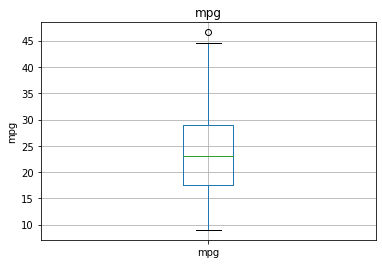

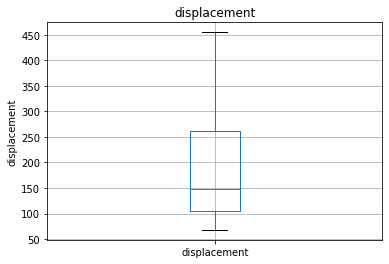

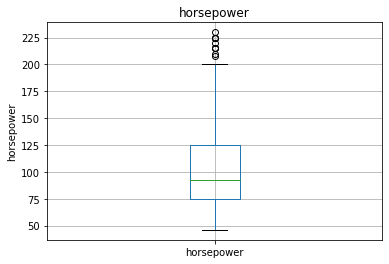

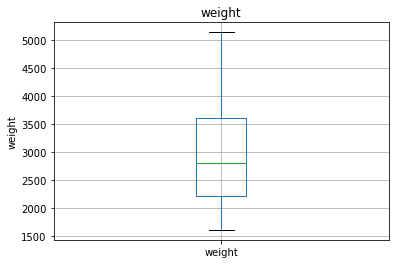

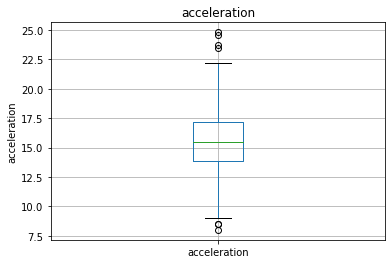

In [11]:
for feature in continous_variable:
    car.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

<h1 style = "color:green";> Bivariate Analysis </h1>

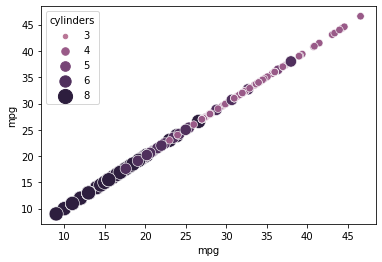

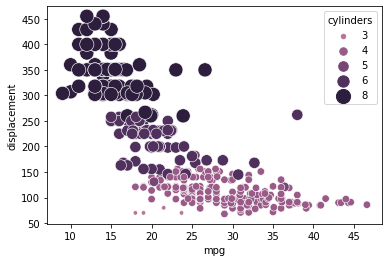

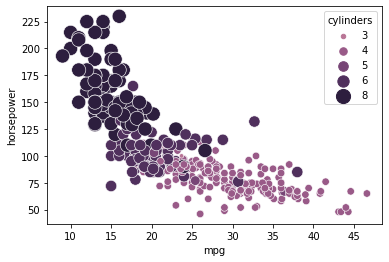

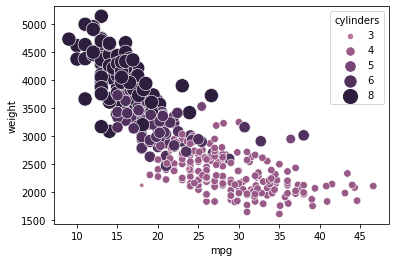

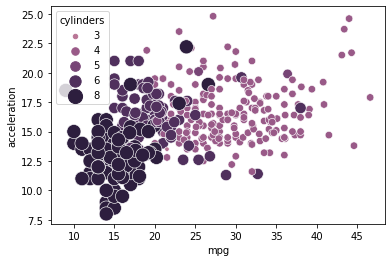

In [12]:
for feature in continous_variable:
    sns.scatterplot(data=car, x="mpg", y=feature,hue="cylinders",size='cylinders',sizes=(20, 200), hue_norm=(0, 7), legend="full")
    plt.show()

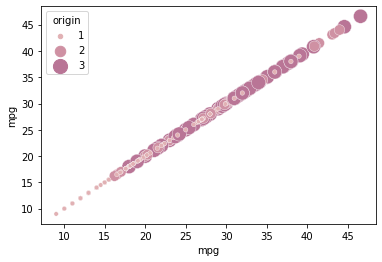

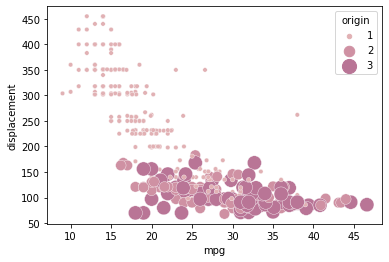

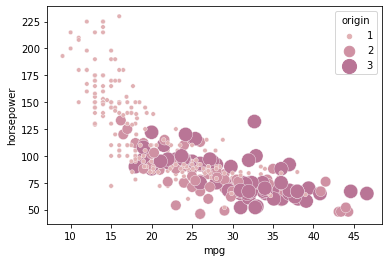

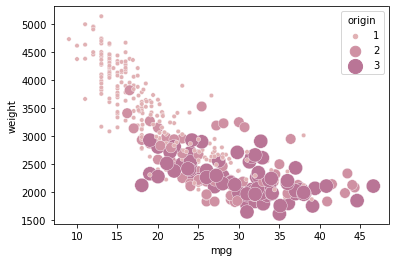

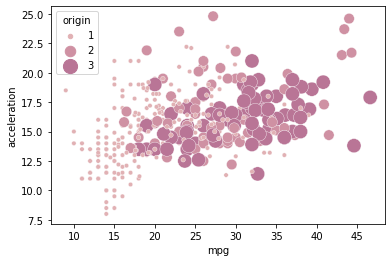

In [13]:
for feature in continous_variable:
    sns.scatterplot(data=car, x="mpg", y=feature,hue="origin",size='origin',
    sizes=(20, 200), hue_norm=(0, 7), legend="full")
    plt.show()

<AxesSubplot:>

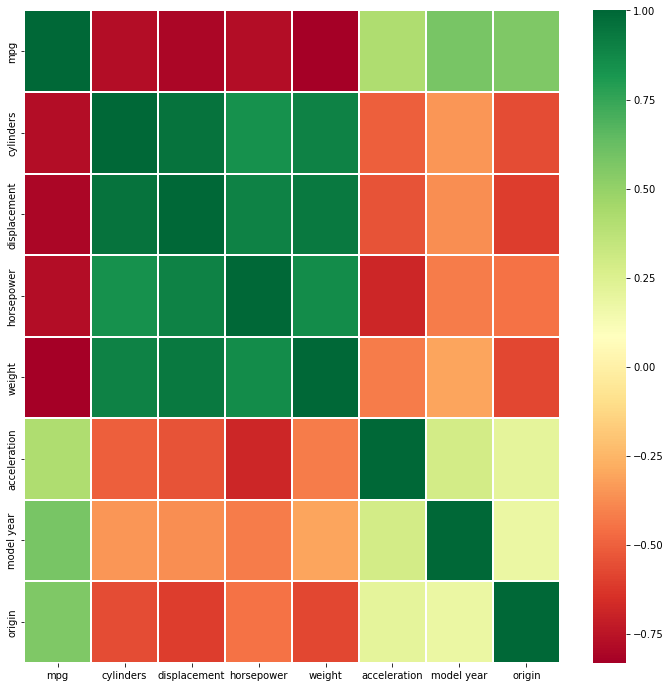

In [14]:
plt.figure(figsize=(12,12))
sns.heatmap(car.corr(),fmt="",cmap='RdYlGn',linewidths=0.30)

<h1 style = "color:green";> Multivariate Analysis </h1>

In [15]:
car.corr()

mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.775396     -0.804203   -0.777501 -0.831741   
cylinders    -0.775396   1.000000      0.950721    0.842437  0.896017   
displacement -0.804203   0.950721      1.000000    0.897082  0.932824   
horsepower   -0.777501   0.842437      0.897082    1.000000  0.863990   
weight       -0.831741   0.896017      0.932824    0.863990  1.000000   
acceleration  0.420289  -0.505419     -0.543684   -0.686436 -0.417457   
model year    0.579267  -0.348746     -0.370164   -0.417081 -0.306564   
origin        0.563450  -0.562543     -0.609409   -0.452386 -0.581024   

              acceleration  model year    origin  
mpg               0.420289    0.579267  0.563450  
cylinders        -0.505419   -0.348746 -0.562543  
displacement     -0.543684   -0.370164 -0.609409  
horsepower       -0.686436   -0.417081 -0.452386  
weight           -0.417457   -0.306564 -0.581024  
acceleration      1.000000    0.288137  0.205873  
model year        0.288137    1.000000  0.180662  
origin            0.205873    0.180662  1.000000

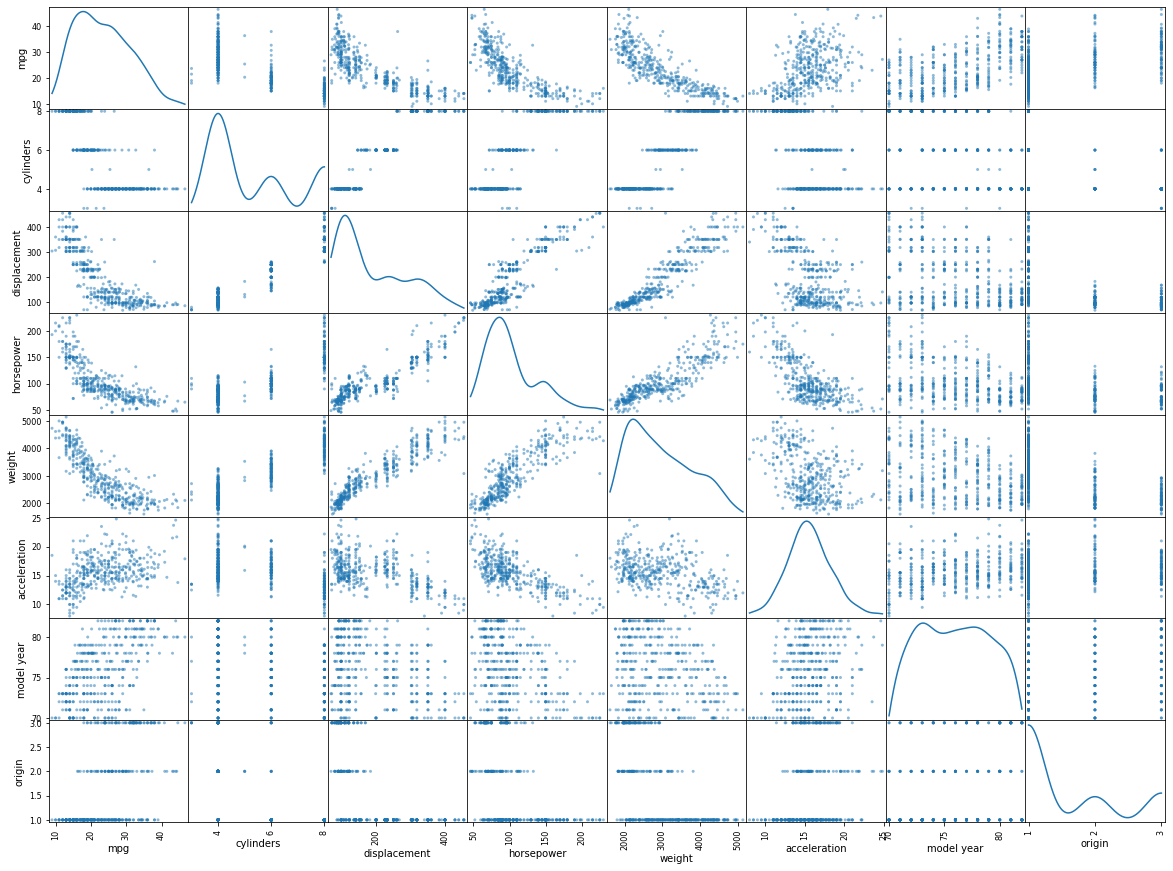

In [16]:
pd.plotting.scatter_matrix(car, diagonal="kde",figsize=(20,15))
plt.show()

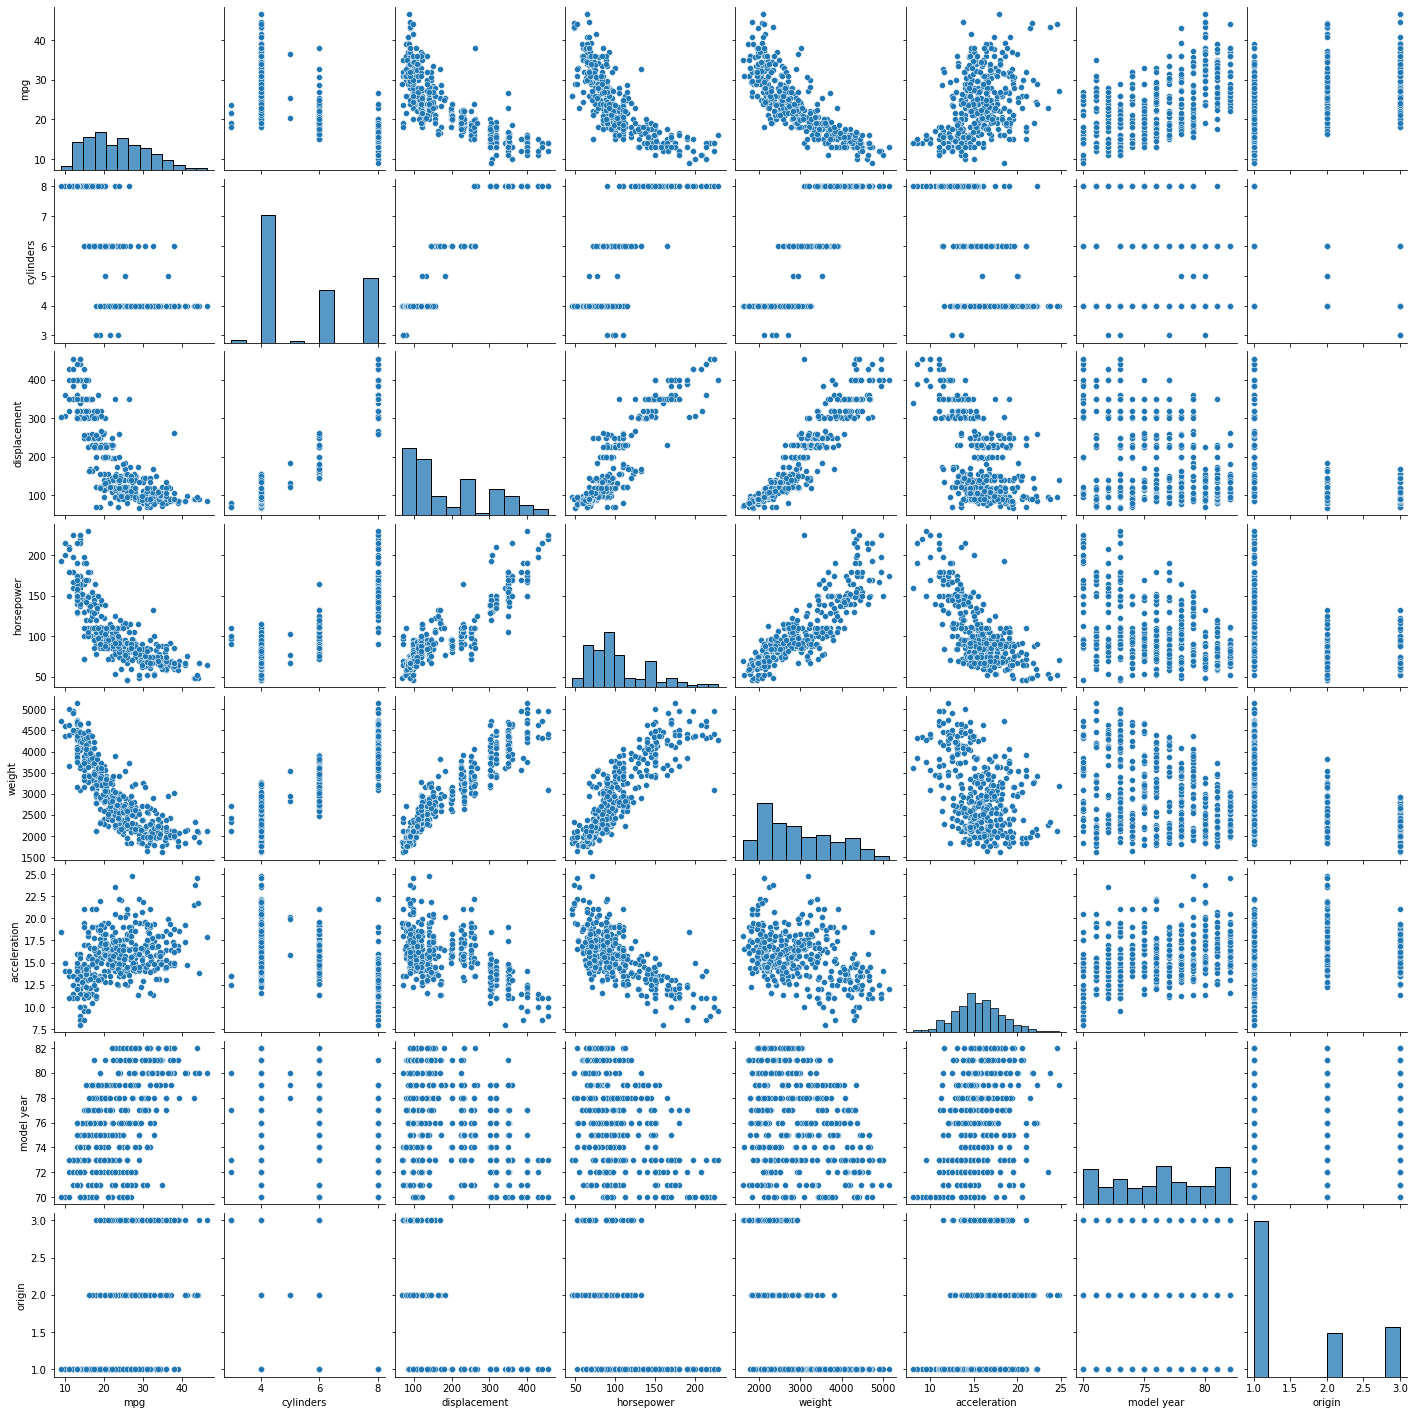

In [17]:
sns.pairplot(car)

In [18]:
car.describe()

mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  398.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.165829  2970.424623   
std      7.815984    1.701004    104.269838   38.298676   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.750000   
50%     23.000000    4.000000    148.500000   92.000000  2803.500000   
75%     29.000000    8.000000    262.000000  125.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model year      origin  
count    398.000000  398.000000  398.000000  
mean      15.568090   76.010050    1.572864  
std        2.757689    3.697627    0.802055  
min        8.000000   70.000000    1.000000  
25%       13.825000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.175000   79.000000    2.000000  
max       24.800000   82.000000    3.000000

In [19]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 28.1+ KB


<h1 style="color:red";> Descriptive_statistics </h1>

In [20]:
car.mean()

/tmp/wsuser/ipykernel_375/1170622532.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  car.mean()


mpg               23.514573
cylinders          5.454774
displacement     193.425879
horsepower       104.165829
weight          2970.424623
acceleration      15.568090
model year        76.010050
origin             1.572864
dtype: float64

In [21]:
car.median()

/tmp/wsuser/ipykernel_375/961299306.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  car.median()


mpg               23.0
cylinders          4.0
displacement     148.5
horsepower        92.0
weight          2803.5
acceleration      15.5
model year        76.0
origin             1.0
dtype: float64

In [22]:
car.mode()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  13.0        4.0          97.0       150.0    1985          14.5   
1   NaN        NaN           NaN         NaN    2130           NaN   

   model year  origin    car name  
0        73.0     1.0  ford pinto  
1         NaN     NaN         NaN

In [23]:
# Measure of dispersed
for feature in continous_variable:
    data1 = max(car[feature]) - min(car[feature])
    print(data1)

37.6
387.0
184
3527
16.8


In [24]:
car.var()

/tmp/wsuser/ipykernel_375/1087542622.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  car.var()


mpg                 61.089611
cylinders            2.893415
displacement     10872.199152
horsepower        1466.788552
weight          717140.990526
acceleration         7.604848
model year          13.672443
origin               0.643292
dtype: float64

In [25]:
car.std()

/tmp/wsuser/ipykernel_375/2098329851.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  car.std()


mpg               7.815984
cylinders         1.701004
displacement    104.269838
horsepower       38.298676
weight          846.841774
acceleration      2.757689
model year        3.697627
origin            0.802055
dtype: float64

In [26]:
car.skew()

/tmp/wsuser/ipykernel_375/2526934436.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  car.skew()


mpg             0.457066
cylinders       0.526922
displacement    0.719645
horsepower      1.106827
weight          0.531063
acceleration    0.278777
model year      0.011535
origin          0.923776
dtype: float64

In [27]:
car.kurt()

/tmp/wsuser/ipykernel_375/2577377318.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  car.kurt()


mpg            -0.510781
cylinders      -1.376662
displacement   -0.746597
horsepower      0.753032
weight         -0.785529
acceleration    0.419497
model year     -1.181232
origin         -0.817597
dtype: float64

<h1 style="color:blue";> Checking_Missing_Values </h1>

In [28]:
car.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

# Preprocessing

# Create make features

In [29]:
import re

In [30]:
car["make"] = car["car name"].apply(lambda x: re.search(r'^\w+', x).group(0))

In [31]:
car = car.drop("car name",axis=1)

In [32]:
car

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0         130    3504          12.0   
1    15.0          8         350.0         165    3693          11.5   
2    18.0          8         318.0         150    3436          11.0   
3    16.0          8         304.0         150    3433          12.0   
4    17.0          8         302.0         140    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0          86    2790          15.6   
394  44.0          4          97.0          52    2130          24.6   
395  32.0          4         135.0          84    2295          11.6   
396  28.0          4         120.0          79    2625          18.6   
397  31.0          4         119.0          82    2720          19.4   

     model year  origin       make  
0            70       1  chevrolet  
1            70       1      buick  
2            70       1   plymouth  
3            70       1        amc  
4            70       1       ford  
..          ...     ...        ...  
393          82       1       ford  
394          82       2         vw  
395          82       1      dodge  
396          82       1       ford  
397          82       1      chevy  

[398 rows x 9 columns]

# Fix typos in make names

In [33]:
make_typo_correction = {
        'vw': 'volkswagen',
        'chevy': 'chevrolet',
        'maxda': 'mazda',
        'vokswagen': 'volkswagen',
        'toyouta': 'toyota',
        'chevroelt': 'chevrolet'
    }
car['make'] = car['make'].replace(make_typo_correction)

In [34]:
car

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0         130    3504          12.0   
1    15.0          8         350.0         165    3693          11.5   
2    18.0          8         318.0         150    3436          11.0   
3    16.0          8         304.0         150    3433          12.0   
4    17.0          8         302.0         140    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0          86    2790          15.6   
394  44.0          4          97.0          52    2130          24.6   
395  32.0          4         135.0          84    2295          11.6   
396  28.0          4         120.0          79    2625          18.6   
397  31.0          4         119.0          82    2720          19.4   

     model year  origin        make  
0            70       1   chevrolet  
1            70       1       buick  
2            70       1    plymouth  
3            70       1         amc  
4            70       1        ford  
..          ...     ...         ...  
393          82       1        ford  
394          82       2  volkswagen  
395          82       1       dodge  
396          82       1        ford  
397          82       1   chevrolet  

[398 rows x 9 columns]

In [35]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
car['make']= label_encoder.fit_transform(car['make'])

# Split df into x and y

In [36]:
y = car['mpg'].copy()
x = car.drop('mpg', axis=1).copy()

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=123)

# Using a simple linear model

In [38]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

linear_r2 = linear_model.score(x_test, y_test)
print("Linear Regression R^2: {:.1f}".format(linear_r2))

Linear Regression R^2: 0.8


# Using a decision tree model

In [39]:
tree_model = DecisionTreeRegressor()
tree_model.fit(x_train, y_train)

tree_r2 = tree_model.score(x_test, y_test)
print("Decision Tree R^2: {:.5f}".format(tree_r2))

Decision Tree R^2: 0.73206


# Using ranadom forest regression model

In [40]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)

rf_r2 = rf_model.score(x_test, y_test)
print("Random Forest R^2: {:.5f}".format(rf_r2))

Random Forest R^2: 0.83855


In [41]:
x_test

cylinders  displacement  horsepower  weight  acceleration  model year  \
150          4         108.0          93    2391          15.5          74   
42           8         383.0         180    4955          11.5          71   
120          4         121.0         112    2868          15.5          73   
102          4          97.0          46    1950          21.0          73   
293          4          89.0          71    1925          14.0          79   
..         ...           ...         ...     ...           ...         ...   
327          5         121.0          67    2950          19.9          80   
223          8         318.0         145    4140          13.7          77   
283          6         232.0          90    3265          18.2          79   
273          4         119.0          97    2405          14.9          78   
377          4          91.0          68    1970          17.6          82   

     origin  make  
150       3    25  
42        1     9  
120       2    29  
102       2    28  
293       2    28  
..      ...   ...  
327       2     1  
223       1     9  
283       1     0  
273       3     8  
377       3    14  

[120 rows x 8 columns]

In [42]:
rf_model.predict(x_test)

array([24.551, 12.23 , 21.142, 28.389, 36.816, 18.993, 30.458, 29.012,
       33.396, 13.295, 28.304, 35.627, 20.554, 19.924, 18.141, 20.107,
       15.262, 21.497, 14.89 , 14.15 , 37.797, 16.327, 28.233, 30.427,
       19.422, 17.751, 15.79 , 31.024, 29.601, 26.154, 23.239, 19.147,
       25.795, 15.019, 27.408, 29.457, 23.837, 37.019, 14.78 , 33.23 ,
       15.672, 37.202, 31.988, 35.726, 28.315, 17.704, 14.709, 23.955,
       28.938, 36.173, 12.825, 31.172, 27.627, 27.046, 32.743, 19.721,
       16.055, 25.221, 15.498, 22.57 , 24.576, 23.15 , 28.32 , 37.568,
       28.275, 23.833, 19.245, 33.273, 18.66 , 25.642, 14.755, 19.127,
       24.742, 27.99 , 18.941, 29.342, 17.822, 20.124, 16.362, 17.966,
       15.372, 29.645, 13.775, 31.862, 26.248, 31.971, 17.634, 24.362,
       12.03 , 24.134, 17.129, 18.574, 25.022, 31.658, 15.841, 16.698,
       24.319, 34.642, 13.5  , 35.327, 18.152, 15.212, 23.931, 14.73 ,
       19.115, 14.963, 28.708, 23.173, 17.17 , 23.192, 18.468, 19.289,
      

In [43]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": "McA0cABIxbmWF-itHuc3Tat6XJ0FtvRJHwgQjLDcZI5R"
}
client=APIClient(wml_credentials)

In [44]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    #print(space)
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [45]:
space_uid = guid_from_space_name(client, 'models')
print("Space UID = " + space_uid)

Space UID = f07214d2-ef23-4551-a74a-98004974c9aa


In [46]:
client.set.default_space(space_uid)

'SUCCESS'

In [47]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [48]:
software_spec_uid = client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [49]:
model_details = client.repository.store_model(
    model=rf_model,meta_props={
        client.repository.ModelMetaNames.NAME:"RandomForest_modeling",
        client.repository.ModelMetaNames.TYPE:"scikit-learn_1.0",
        client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid,
    }
)
model_id = client.repository.get_model_uid(model_details)

This method is deprecated, please use get_model_id()


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/ibm_watson_machine_learning/repository.py:1453: UserWarning: This method is deprecated, please use get_model_id()
  warn("This method is deprecated, please use get_model_id()")


In [50]:
model_id

'fa491e42-cc7a-4451-93e5-0f37cb7219fa'